In [24]:
from __future__ import print_function

import os
import subprocess
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [10]:
def get_data():
    if os.path.exists("slow_loris_filtered.csv"):
        print("-- slow_loris.csv found locally")
    df = pd.read_csv("slow_loris_filtered.csv", index_col=False)
    return df

In [16]:
def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)
    return (df_mod, targets)

In [11]:
data = get_data()

-- slow_loris.csv found locally


In [14]:
print("* label types:", data[" Label"].unique(), sep="\n")

print(data.keys())
print(data.shape[0])
print(data.shape[1])

* label types:
['BENIGN' 'DoS slowloris']
Index([u'Flow ID', u' Source IP', u' Source Port', u' Destination IP',
       u' Destination Port', u' Protocol', u' Timestamp', u' Flow Duration',
       u' Total Fwd Packets', u' Total Backward Packets',
       u'Total Length of Fwd Packets', u' Total Length of Bwd Packets',
       u' Fwd Packet Length Max', u' Fwd Packet Length Min',
       u' Fwd Packet Length Mean', u' Fwd Packet Length Std',
       u'Bwd Packet Length Max', u' Bwd Packet Length Min',
       u' Bwd Packet Length Mean', u' Bwd Packet Length Std', u'Flow Bytes/s',
       u' Flow Packets/s', u' Flow IAT Mean', u' Flow IAT Std',
       u' Flow IAT Max', u' Flow IAT Min', u'Fwd IAT Total', u' Fwd IAT Mean',
       u' Fwd IAT Std', u' Fwd IAT Max', u' Fwd IAT Min', u'Bwd IAT Total',
       u' Bwd IAT Mean', u' Bwd IAT Std', u' Bwd IAT Max', u' Bwd IAT Min',
       u'Fwd PSH Flags', u' Bwd PSH Flags', u' Fwd URG Flags',
       u' Bwd URG Flags', u' Fwd Header Length', u' Bwd Head

In [15]:
columns = ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',]
data.drop(columns, inplace=True, axis=1)
print(data.keys())
print(data.shape[0])
print(data.shape[1])

Index([u' Flow Duration', u' Total Fwd Packets', u' Total Backward Packets',
       u'Total Length of Fwd Packets', u' Total Length of Bwd Packets',
       u' Fwd Packet Length Max', u' Fwd Packet Length Min',
       u' Fwd Packet Length Mean', u' Fwd Packet Length Std',
       u'Bwd Packet Length Max', u' Bwd Packet Length Min',
       u' Bwd Packet Length Mean', u' Bwd Packet Length Std', u'Flow Bytes/s',
       u' Flow Packets/s', u' Flow IAT Mean', u' Flow IAT Std',
       u' Flow IAT Max', u' Flow IAT Min', u'Fwd IAT Total', u' Fwd IAT Mean',
       u' Fwd IAT Std', u' Fwd IAT Max', u' Fwd IAT Min', u'Bwd IAT Total',
       u' Bwd IAT Mean', u' Bwd IAT Std', u' Bwd IAT Max', u' Bwd IAT Min',
       u'Fwd PSH Flags', u' Bwd PSH Flags', u' Fwd URG Flags',
       u' Bwd URG Flags', u' Fwd Header Length', u' Bwd Header Length',
       u'Fwd Packets/s', u' Bwd Packets/s', u' Min Packet Length',
       u' Max Packet Length', u' Packet Length Mean', u' Packet Length Std',
       u' Packe

In [17]:
df2, targets = encode_target(data, " Label")

print("* df2.head()", df2[["Target", " Label"]].head(), sep="\n", end="\n\n")
print("* df2.tail()", df2[["Target", " Label"]].tail(), sep="\n", end="\n\n")
print("* targets", targets, sep="\n", end="\n\n")


* df2.head()
   Target   Label
0       0  BENIGN
1       0  BENIGN
2       0  BENIGN
3       0  BENIGN
4       0  BENIGN

* df2.tail()
       Target   Label
31254       0  BENIGN
31255       0  BENIGN
31256       0  BENIGN
31257       0  BENIGN
31258       0  BENIGN

* targets
['BENIGN' 'DoS slowloris']



In [18]:
features = list(df2.columns[:-2])
y = df2["Target"]
X = df2[features]
print("* features:", features, sep="\n")

* features:
[' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', '

In [19]:
col = X.columns[X.dtypes.eq(object)]
X[col] = X[col].apply(pd.to_numeric, errors='coerce', axis=1)

/home/chromares/.local/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
X.dtypes

 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                   float64
 Flow IAT Min                   float64
Fwd IAT Total                   float64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                    float64
 Fwd IAT Min                    float64
Bwd IAT Total                   float64


In [21]:
X

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1137846,10,10,851,3950,267,0,85.100000,99.870416,1953,...,5,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
1,512617,6,7,468,635,282,0,78.000000,122.846245,458,...,3,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
2,1266840,4,3,1095,2929,1095,0,273.750000,547.500000,1481,...,1,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
3,99,2,0,0,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
4,307666,7,6,451,5174,451,0,64.428571,170.461977,1448,...,1,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
5,183932,10,7,1599,6661,1599,0,159.900000,505.648198,1884,...,1,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
6,3,2,0,2791,0,1753,1038,1395.500000,505.581349,0,...,1,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
7,98,2,0,0,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
8,5715038,4,2,0,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
9,5585147,3,1,0,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0


In [22]:
np.where(np.isnan(X))

(array([  117,   117,   133,   133,  1570,  1570,  2454,  2454,  2782,
         2782,  3297,  3297,  6237,  6237,  6238,  6238, 12014, 12014,
        13237, 13237, 22951, 22951, 23329, 23329, 23456, 23456, 26377,
        26377, 29278, 29278, 30955, 30955]),
 array([13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13,
        14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14]))

In [23]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

0    25471
1     5788
Name: Target, dtype: int64

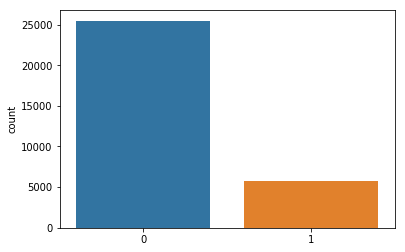

In [28]:
graph = sns.countplot(y ,label="Count")
df2["Target"].value_counts()